In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data.pickle')

In [3]:
df.head()

field1     field2     field3     field4
created_at                                                     
2019-07-18 22:20:00  25.850000  63.000000  27.700000  56.000000
2019-07-18 22:25:00  25.900000  63.000000  27.700000  55.666667
2019-07-18 22:30:00  25.900000  62.000000  27.650000  55.000000
2019-07-18 22:35:00  25.866667  62.333333  27.666667  54.333333
2019-07-18 22:40:00  25.900000  62.000000  27.700000  54.500000

In [4]:
df.tail()

field1     field2     field3     field4
created_at                                                     
2019-08-21 23:20:00  28.000000  70.625000  28.200000  65.000000
2019-08-21 23:25:00  28.150000  70.000000  27.966667  64.666667
2019-08-21 23:30:00  27.966667  69.666667  28.350000  64.000000
2019-08-21 23:35:00  27.900000  69.000000  28.433333  64.000000
2019-08-21 23:40:00  27.900000  68.000000  28.200000  66.000000

In [4]:
df['time'] = df.index.hour+df.index.minute/60+df.index.second/3600

In [5]:
df.corr()

field1    field2    field3    field4      time
field1  1.000000  0.225656  0.852050  0.338119  0.070852
field2  0.225656  1.000000  0.238780  0.684044  0.042163
field3  0.852050  0.238780  1.000000  0.165021  0.110402
field4  0.338119  0.684044  0.165021  1.000000  0.105951
time    0.070852  0.042163  0.110402  0.105951  1.000000

In [6]:
df2=pd.DataFrame([])
for col in df.columns:
    for t in range(0,250,25):
        df2[col+'_diff_'+str(t)] = df[col].shift(-t)
print(df2.shape)

(7199, 50)


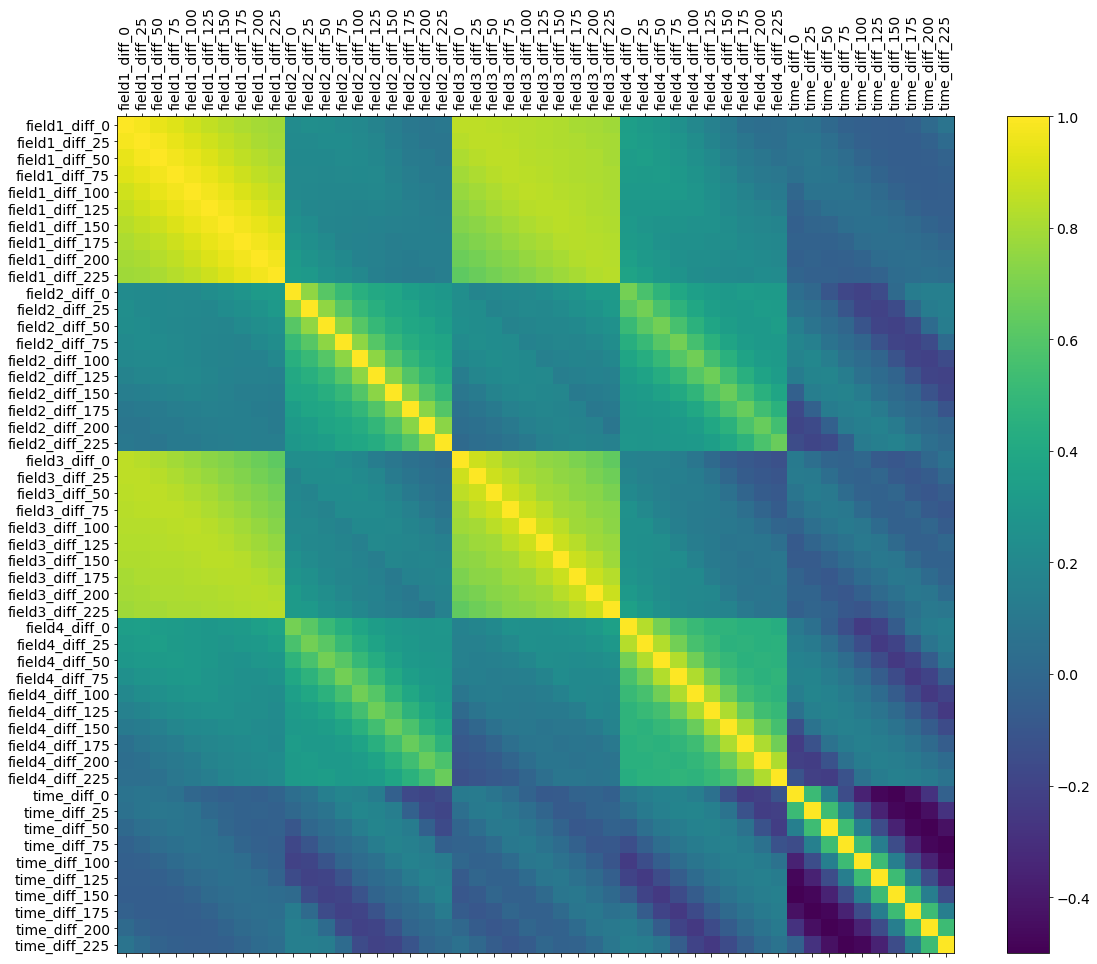

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [8]:
df.shape

(7199, 5)

In [9]:
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D  

rcParams['figure.figsize'] = 15, 7

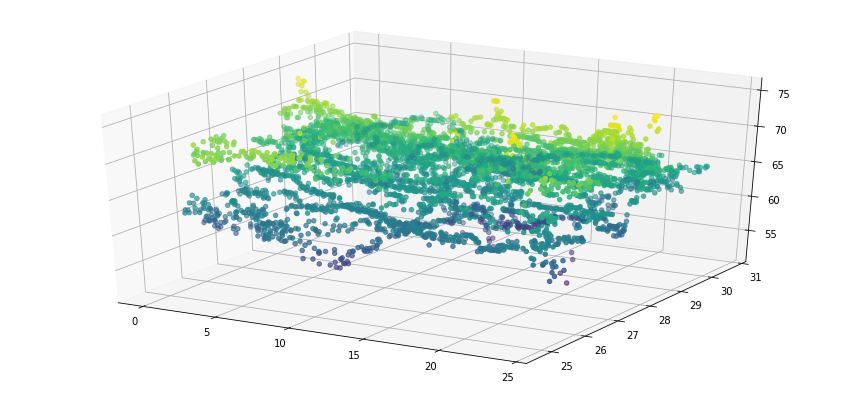

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.time,df.field1,df.field2,c=df.field2)


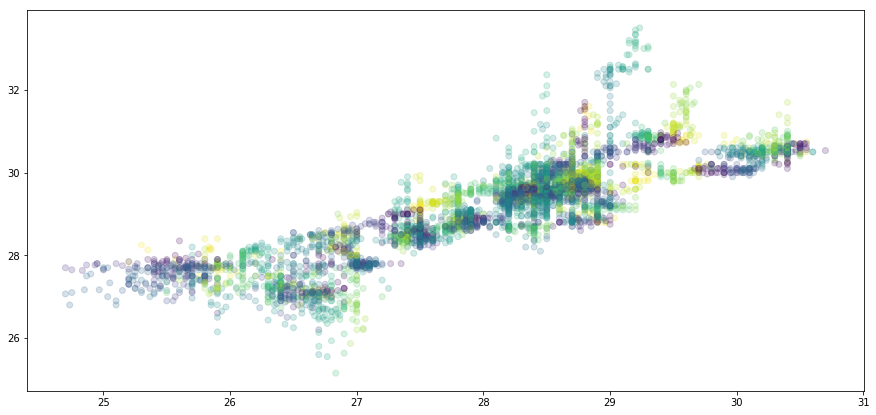

In [11]:
plt.scatter(df.field1,df.field3,c=df.time,alpha=.2)

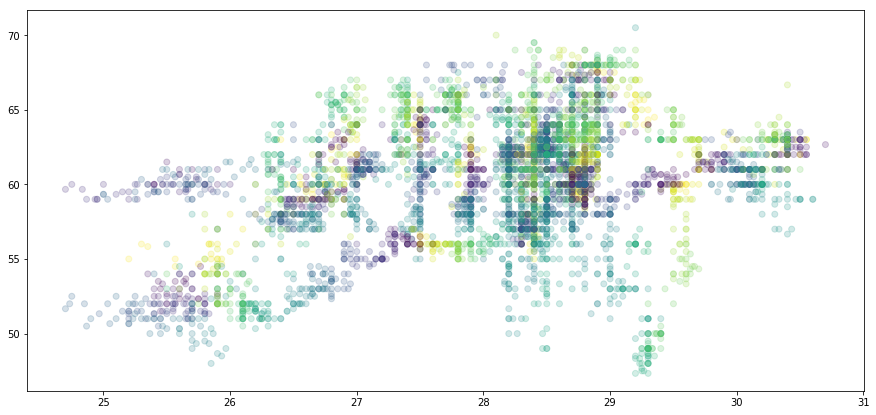

In [12]:
plt.scatter(df.field1,df.field4,c=df.time,alpha=.2)

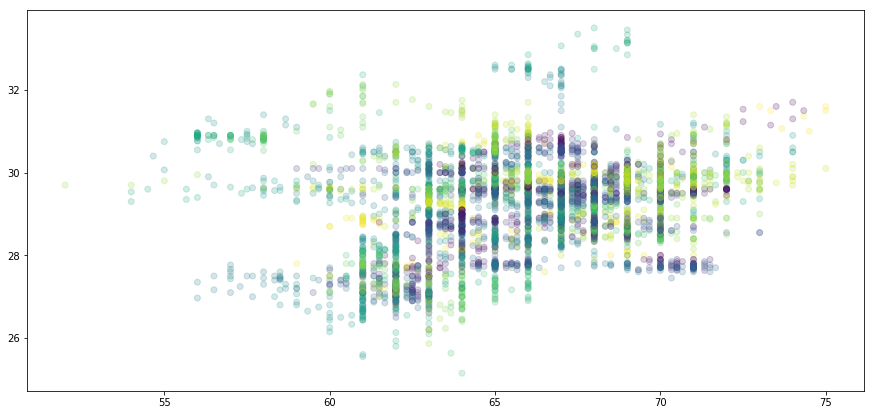

In [13]:
plt.scatter(df.field2,df.field3,c=df.time,alpha=.2)

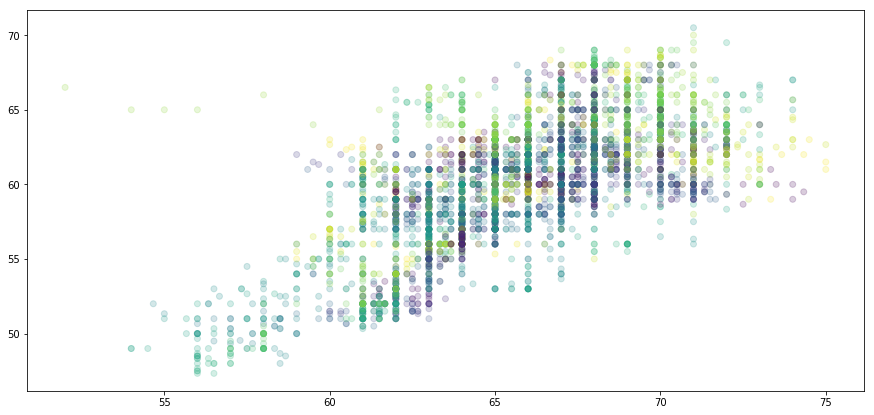

In [14]:
plt.scatter(df.field2,df.field4,c=df.time,alpha=.2)

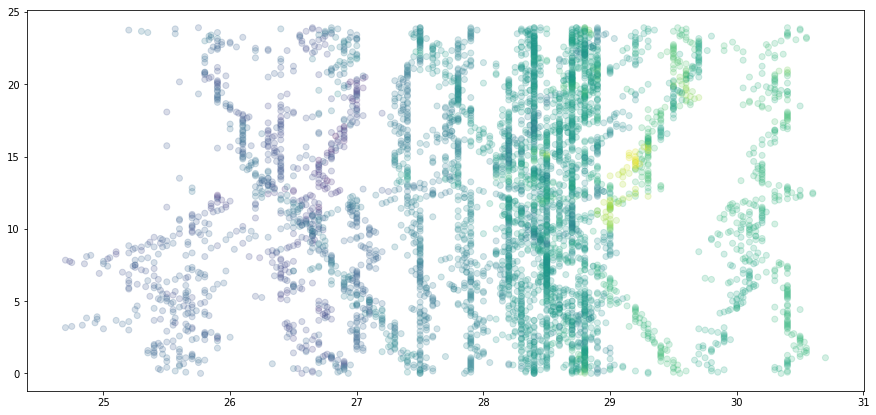

In [15]:
plt.scatter(df.field1,df.time,c=df.field3,alpha=.2)

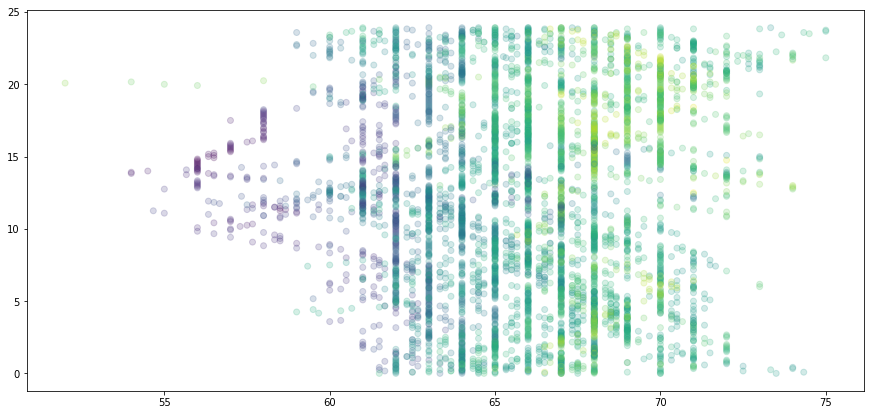

In [16]:
plt.scatter(df.field2,df.time,c=df.field4,alpha=.2)

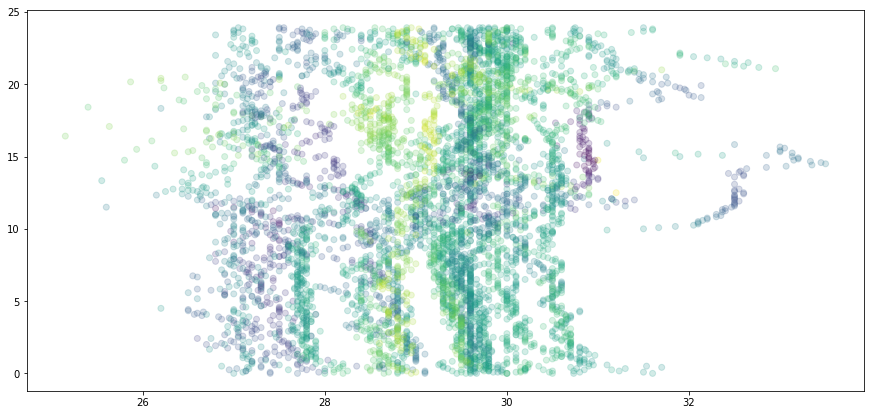

In [17]:
plt.scatter(df.field3,df.time,c=df.field4,alpha=.2)

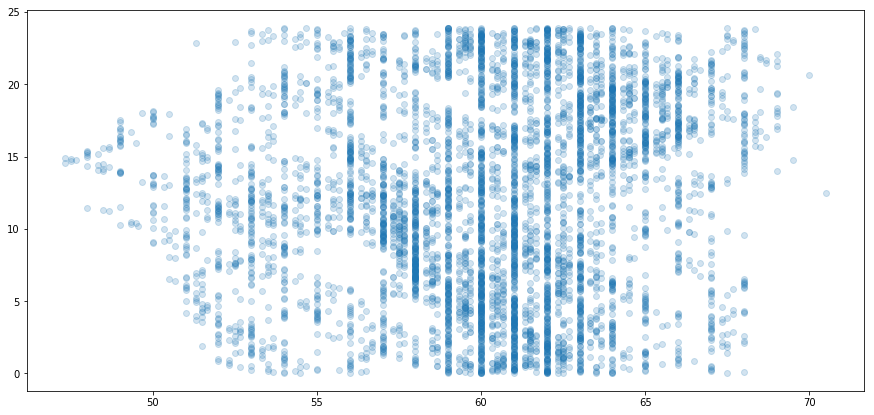

In [18]:
plt.scatter(df.field4,df.time,alpha=.2)

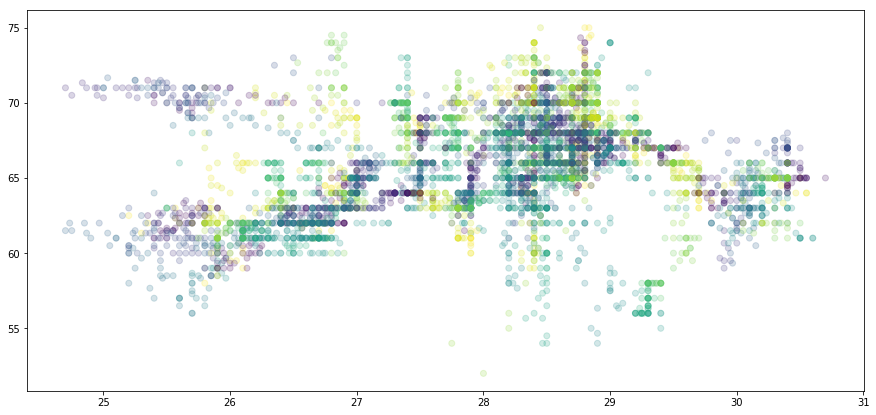

In [19]:
plt.scatter(df.field1,df.field2,c=df.time,alpha=.2)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_pickle('data.pickle')
df['time'] = df.index.hour
df = pd.concat([df,pd.get_dummies(df['time'])],axis=1)

In [22]:
df = df[df.index >= '2019-07-22 00:00:00']

In [23]:
df.drop('time',axis=1,inplace=True)

In [24]:
df.drop(0,axis=1,inplace=True)

In [25]:
dfx = df.copy()
cols = dfx.columns
for col in cols[:4]:
    dfx[col] = dfx[col].interpolate(method='polynomial', order=2)
    dfx[str(col)+'_t10'] = df[col].shift(10)
dfx=dfx.dropna(axis=0)
cols = dfx.columns
cols

Index([    'field1',     'field2',     'field3',     'field4',            1,
                  2,            3,            4,            5,            6,
                  7,            8,            9,           10,           11,
                 12,           13,           14,           15,           16,
                 17,           18,           19,           20,           21,
                 22,           23, 'field1_t10', 'field2_t10', 'field3_t10',
       'field4_t10'],
      dtype='object')

In [26]:
for col in cols[:4]:
    cols2 = list(cols)
    cols2.remove(col)
    print(cols2)
    model = LinearRegression()
    model.fit(dfx[cols2].values, dfx[str(col)].values)
    dfx[str(col)+'_pred'] = model.predict(dfx[cols2].values)

['field2', 'field3', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field3', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field2', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field2', 'field3', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']


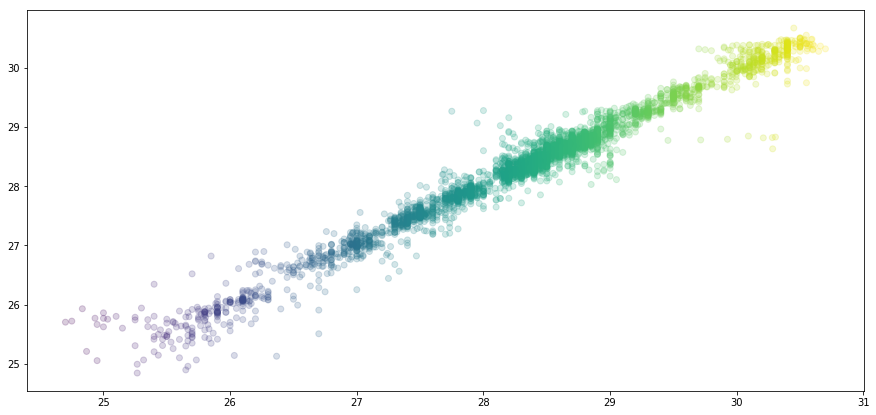

In [27]:
plt.scatter(dfx.field1,dfx.field1_pred,c=dfx.field1,alpha=.2)

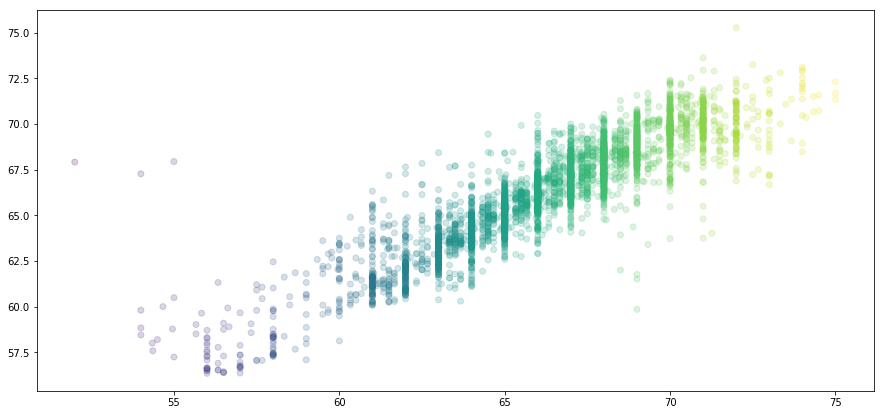

In [28]:
plt.scatter(dfx.field2,dfx.field2_pred,c=dfx.field2,alpha=.2)

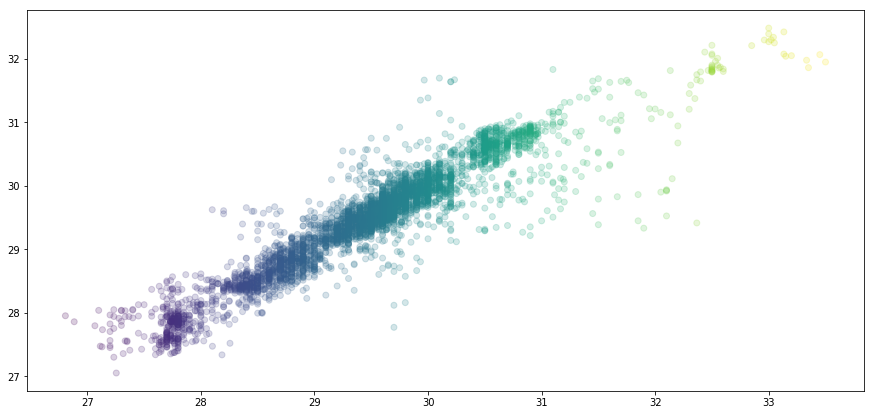

In [29]:
plt.scatter(dfx.field3,dfx.field3_pred,c=dfx.field3,alpha=.2)

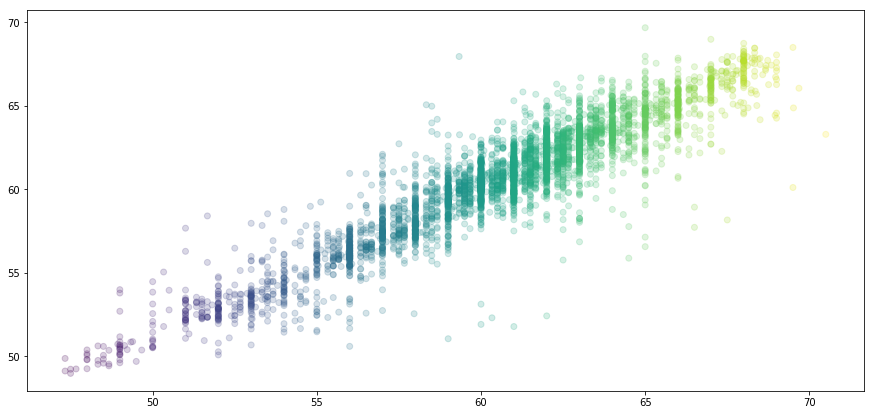

In [30]:
plt.scatter(dfx.field4,dfx.field4_pred,c=dfx.field4,alpha=.2)

In [31]:
print(model.coef_)

[ 0.98957592  0.43887524 -1.08244699  0.3571381  -0.00464571 -0.1620285
 -0.2395697  -0.10500282  0.00928572 -0.05611034  0.0449016  -0.48040052
 -0.40191247 -0.1255156   0.13300786  0.86048683  0.20537805  0.86055631
  0.86764504  0.71970454  0.37214658  0.44440464  0.29054253 -0.05419502
  0.09729375  0.51934452  0.1414679  -0.17349106 -0.04514741  0.68689414]


In [32]:
dfx

field1     field2     field3     field4  1  2  3  4  \
created_at                                                                    
2019-07-22 00:50:00  26.733333  63.666667  27.950000  62.000000  0  0  0  0   
2019-07-22 00:55:00  26.700000  64.000000  27.733333  61.666667  0  0  0  0   
2019-07-22 01:00:00  26.700000  64.333333  27.800000  62.000000  1  0  0  0   
2019-07-22 01:05:00  26.800000  63.500000  27.800000  62.500000  1  0  0  0   
2019-07-22 01:10:00  26.800000  65.000000  27.850000  62.500000  1  0  0  0   
2019-07-22 01:15:00  26.800000  66.000000  27.766667  62.666667  1  0  0  0   
2019-07-22 01:20:00  26.866667  65.333333  27.700000  62.500000  1  0  0  0   
2019-07-22 01:25:00  27.350000  64.500000  27.800000  63.000000  1  0  0  0   
2019-07-22 01:30:00  27.266667  63.333333  27.800000  63.000000  1  0  0  0   
2019-07-22 01:35:00  27.050000  64.500000  27.833333  62.333333  1  0  0  0   
2019-07-22 01:40:00  27.000000  64.666667  27.850000  61.500000  1  0  0  0   
2019-07-22 01:45:00  27.050000  64.500000  27.833333  61.666667  1  0  0  0   
2019-07-22 01:50:00  27.000000  65.000000  27.800000  62.000000  1  0  0  0   
2019-07-22 01:55:00  27.000000  64.500000  27.766667  61.333333  1  0  0  0   
2019-07-22 02:00:00  27.033333  65.000000  27.750000  62.000000  0  1  0  0   
2019-07-22 02:05:00  27.023492  65.133882  27.858760  62.239955  0  1  0  0   
2019-07-22 02:10:00  27.000000  65.000000  27.900000  62.000000  0  1  0  0   
2019-07-22 02:15:00  27.000000  65.000000  27.733333  61.666667  0  1  0  0   
2019-07-22 02:20:00  27.000000  65.000000  27.750000  61.500000  0  1  0  0   
2019-07-22 02:25:00  27.000000  64.500000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:30:00  27.000000  65.000000  27.766667  61.000000  0  1  0  0   
2019-07-22 02:35:00  27.050000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:40:00  27.000000  66.000000  27.766667  61.333333  0  1  0  0   
2019-07-22 02:45:00  27.000000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:50:00  27.000000  65.333333  27.800000  61.000000  0  1  0  0   
2019-07-22 03:00:00  26.966667  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:05:00  27.000000  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:10:00  27.006112  65.690211  27.806605  61.106199  0  0  1  0   
2019-07-22 03:15:00  27.050000  65.500000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:20:00  27.133333  65.666667  27.800000  60.666667  0  0  1  0   
...                        ...        ...        ...        ... .. .. .. ..   
2019-08-12 18:20:00  30.250000  65.500000  30.900000  63.000000  0  0  0  0   
2019-08-12 18:25:00  30.200000  66.000000  30.966667  63.333333  0  0  0  0   
2019-08-12 18:30:00  30.200000  66.000000  30.650000  63.000000  0  0  0  0   
2019-08-12 18:35:00  30.050000  65.500000  30.766667  63.000000  0  0  0  0   
2019-08-12 18:40:00  30.166667  65.666667  30.800000  63.000000  0  0  0  0   
2019-08-12 18:45:00  30.100000  66.000000  30.866667  63.000000  0  0  0  0   
2019-08-12 18:50:00  30.100000  66.000000  30.900000  63.000000  0  0  0  0   
2019-08-12 18:55:00  30.400000  65.000000  30.833333  63.000000  0  0  0  0   
2019-08-12 19:10:00  30.333333  65.000000  30.750000  63.000000  0  0  0  0   
2019-08-12 19:15:00  30.400000  65.000000  30.733333  63.000000  0  0  0  0   
2019-08-12 19:20:00  30.333333  65.000000  30.750000  63.500000  0  0  0  0   
2019-08-12 19:25:00  30.250000  65.000000  30.700000  63.000000  0  0  0  0   
2019-08-12 19:30:00  30.400000  65.000000  30.600000  64.000000  0  0  0  0   
2019-08-12 19:35:00  30.300000  65.000000  30.666667  63.333333  0  0  0  0   
2019-08-12 19:40:00  30.300000  65.000000  30.600000  63.000000  0  0  0  0   
2019-08-12 19:45:00  30.266667  65.000000  30.533333  64.000000  0  0  0  0   
2019-08-12 19:50:00  30.200000  65.000000  30.481448  64.227805  0  0  0  0   
2019-08-12 19:55:00  30.166667  65.000000  30.466667  64.000000  0  0  0  

In [33]:
dfz = dfx[['field1','field1_pred','field2','field2_pred','field3','field3_pred','field4','field4_pred']]
for i in range(1,5):
    dfz['field'+str(i)+'_diff'] = (dfz['field'+str(i)] - dfz['field'+str(i)+'_pred'])
    dfz['field'+str(i)+'_diff'] = (dfz['field'+str(i)+'_diff'] - dfz['field'+str(i)+'_diff'].mean()) / (dfz['field'+str(i)+'_diff'].max() - dfz['field'+str(i)+'_diff'].min())
dfz

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


field1  field1_pred     field2  field2_pred  \
created_at                                                            
2019-07-22 00:50:00  26.733333    26.983654  63.666667    65.731181   
2019-07-22 00:55:00  26.700000    26.877823  64.000000    65.611541   
2019-07-22 01:00:00  26.700000    26.995511  64.333333    64.890606   
2019-07-22 01:05:00  26.800000    27.017202  63.500000    65.554168   
2019-07-22 01:10:00  26.800000    27.015551  65.000000    65.721773   
2019-07-22 01:15:00  26.800000    27.008576  66.000000    65.594130   
2019-07-22 01:20:00  26.866667    26.955243  65.333333    65.164965   
2019-07-22 01:25:00  27.350000    27.062211  64.500000    65.397548   
2019-07-22 01:30:00  27.266667    26.980219  63.333333    64.930463   
2019-07-22 01:35:00  27.050000    26.830876  64.500000    65.532786   
2019-07-22 01:40:00  27.000000    26.857058  64.666667    64.956679   
2019-07-22 01:45:00  27.050000    26.815260  64.500000    65.272197   
2019-07-22 01:50:00  27.000000    26.814823  65.000000    65.539838   
2019-07-22 01:55:00  27.000000    26.910983  64.500000    64.573356   
2019-07-22 02:00:00  27.033333    26.851870  65.000000    65.886115   
2019-07-22 02:05:00  27.023492    26.846689  65.133882    66.738165   
2019-07-22 02:10:00  27.000000    26.914416  65.000000    66.239738   
2019-07-22 02:15:00  27.000000    27.346313  65.000000    64.789737   
2019-07-22 02:20:00  27.000000    27.290677  65.000000    64.123762   
2019-07-22 02:25:00  27.000000    27.071802  64.500000    65.000188   
2019-07-22 02:30:00  27.000000    27.013605  65.000000    65.173822   
2019-07-22 02:35:00  27.050000    27.064662  65.000000    65.042242   
2019-07-22 02:40:00  27.000000    27.013158  66.000000    65.474351   
2019-07-22 02:45:00  27.000000    27.015719  65.000000    65.135960   
2019-07-22 02:50:00  27.000000    27.041403  65.333333    65.356462   
2019-07-22 03:00:00  26.966667    26.986495  66.000000    65.631672   
2019-07-22 03:05:00  27.000000    26.979620  66.000000    65.662941   
2019-07-22 03:10:00  27.006112    26.981543  65.690211    65.724044   
2019-07-22 03:15:00  27.050000    26.985254  65.500000    65.393589   
2019-07-22 03:20:00  27.133333    26.970784  65.666667    65.557960   
...                        ...          ...        ...          ...   
2019-08-12 18:20:00  30.250000    30.394723  65.500000    65.633803   
2019-08-12 18:25:00  30.200000    30.399211  66.000000    65.894586   
2019-08-12 18:30:00  30.200000    30.363488  66.000000    65.349989   
2019-08-12 18:35:00  30.050000    30.378399  65.500000    65.516615   
2019-08-12 18:40:00  30.166667    30.383563  65.666667    65.517311   
2019-08-12 18:45:00  30.100000    30.388154  66.000000    65.620501   
2019-08-12 18:50:00  30.100000    30.389715  66.000000    65.669906   
2019-08-12 18:55:00  30.400000    30.390264  65.000000    65.500425   
2019-08-12 19:10:00  30.333333    30.234364  65.000000    65.650123   
2019-08-12 19:15:00  30.400000    30.184616  65.000000    65.947794   
2019-08-12 19:20:00  30.333333    30.182770  65.000000    66.225299   
2019-08-12 19:25:00  30.250000    30.049126  65.000000    65.825715   
2019-08-12 19:30:00  30.400000    30.157124  65.000000    66.024887   
2019-08-12 19:35:00  30.300000    30.089708  65.000000    66.146271   
2019-08-12 19:40:00  30.300000    30.080148  65.000000    65.921650   
2019-08-12 19:45:00  30.266667    30.371090  65.000000    65.286808   
2019-08-12 19:50:00  30.200000    30.190130  65.000000    65.705681   
2019-08-12 19:55:00  30.166667    30.280290  65.000000    65.294887   
2019-08-12 20:00:00  30.300000    30.310036  65.000000    65.426002   
2019-08-12 20:05:00  30.400000    30.368932  65.000000    65.336468   
2019-08-12 20:10:00  30.300000    30.304668  65.000000    65.127106   
2019-08-12 20:15:00  30.300000    30.235750  65.000000    65.463540   
2019-08-12 20:20:00  30.300000    30.381240  65.000000    65.301461   
2019-08-12 20:25:00  30.300000    30.289543  65.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


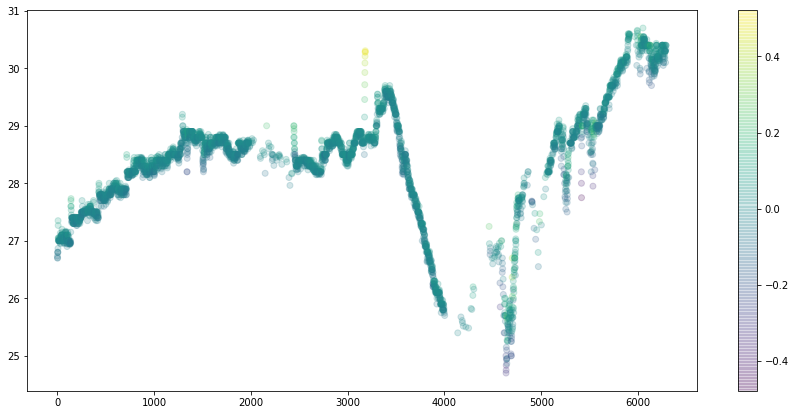

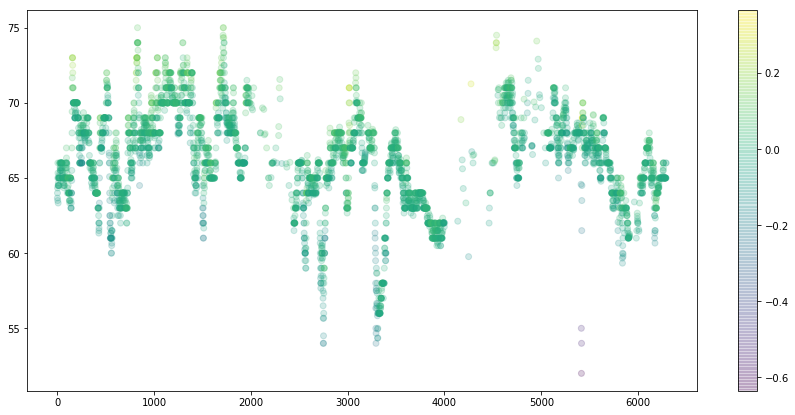

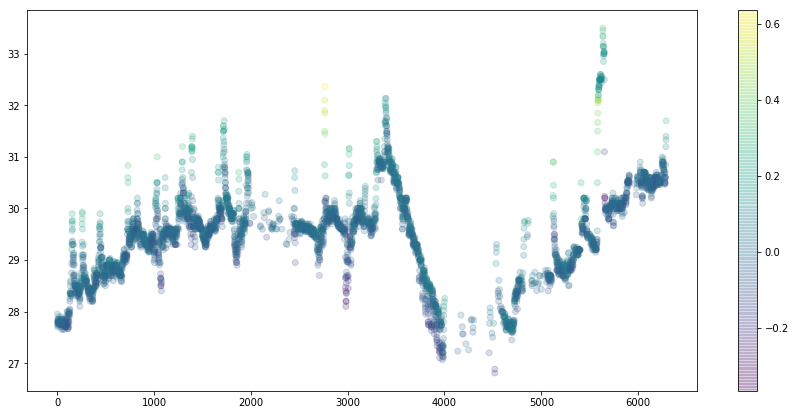

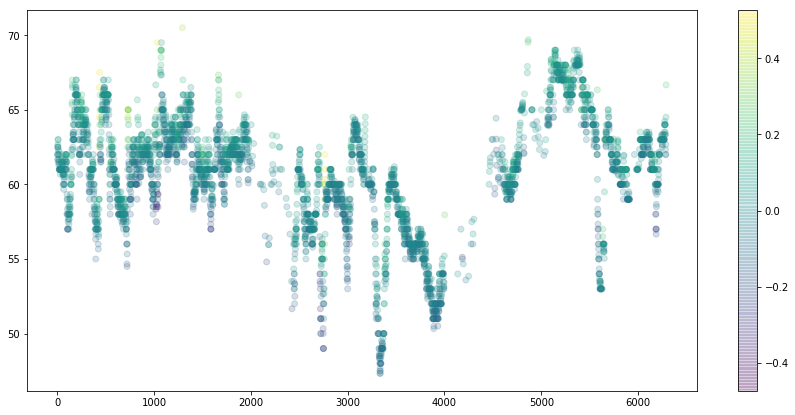

In [34]:
dfz['time'] = (dfz.index.astype(np.int64) - dfz.index.astype(np.int64).min())/300000000000
for g in range(1,5):
    plt.scatter(dfz.time,dfz['field'+str(g)],c=dfz['field'+str(g)+'_diff'], alpha=.2)
    plt.colorbar()
    plt.show()

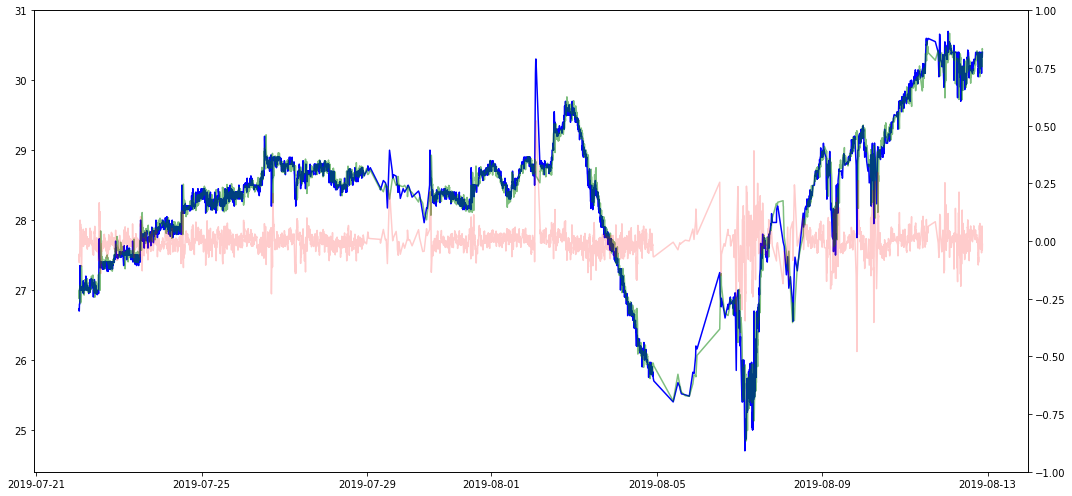

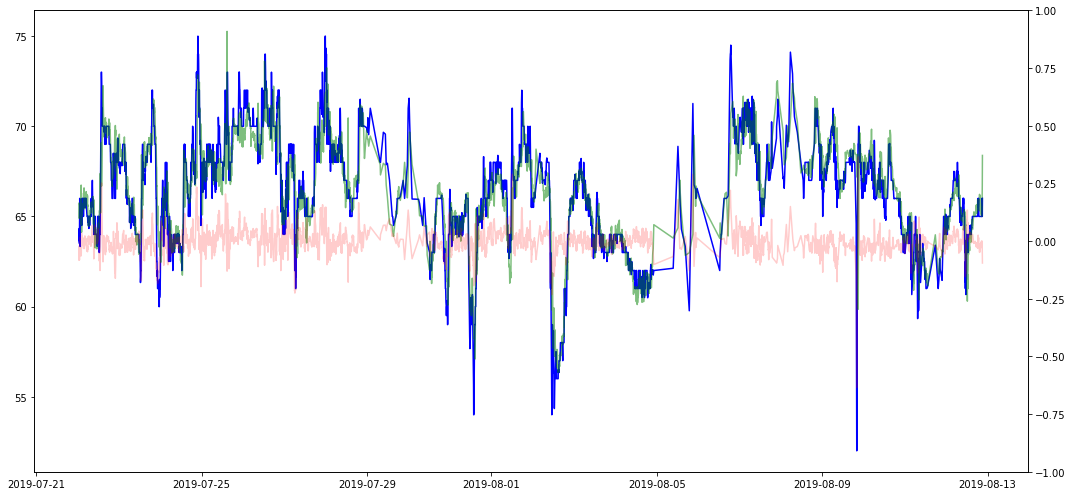

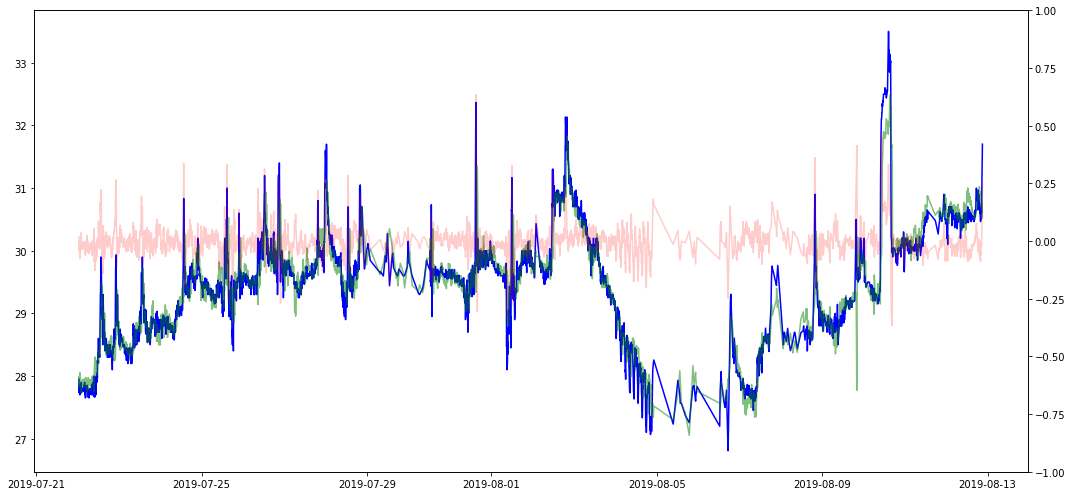

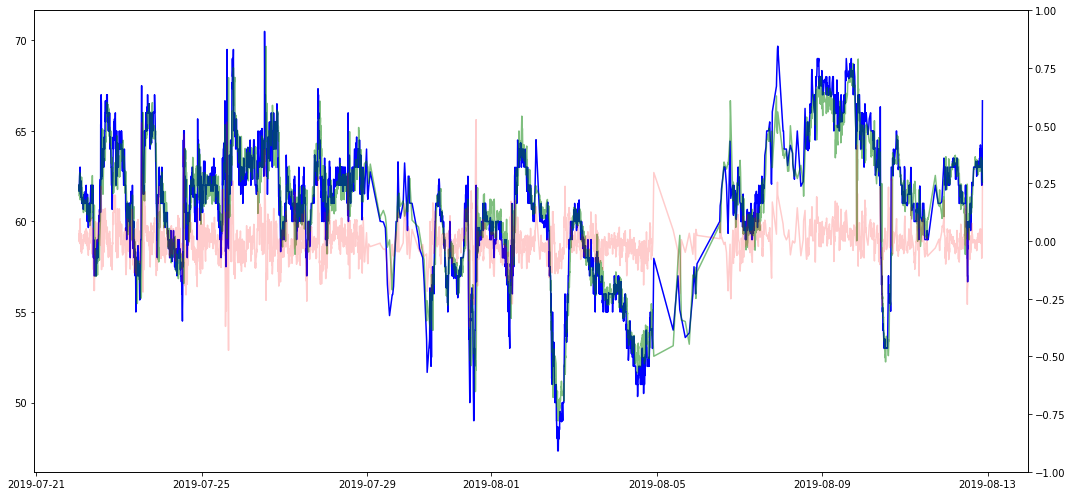

In [35]:
for g in range(1,5):
    fig, ax1 = plt.subplots()
    ax1.plot(dfz['field'+str(g)],c='b')
    ax1.plot(dfz['field'+str(g)+'_pred'],c='g',alpha=.5)
    ax2 = ax1.twinx()
    ax2.set_ylim(-1,1)
    ax2.plot(dfz['field'+str(g)+'_diff'],c='r',alpha=.2)
    fig.tight_layout() 
    plt.show()

In [36]:
dfz.head()

field1  field1_pred     field2  field2_pred  \
created_at                                                            
2019-07-22 00:50:00  26.733333    26.983654  63.666667    65.731181   
2019-07-22 00:55:00  26.700000    26.877823  64.000000    65.611541   
2019-07-22 01:00:00  26.700000    26.995511  64.333333    64.890606   
2019-07-22 01:05:00  26.800000    27.017202  63.500000    65.554168   
2019-07-22 01:10:00  26.800000    27.015551  65.000000    65.721773   

                        field3  field3_pred     field4  field4_pred  \
created_at                                                            
2019-07-22 00:50:00  27.950000    27.867095  62.000000    61.436845   
2019-07-22 00:55:00  27.733333    27.829368  61.666667    61.719576   
2019-07-22 01:00:00  27.800000    27.995018  62.000000    62.034303   
2019-07-22 01:05:00  27.800000    27.817957  62.500000    61.634443   
2019-07-22 01:10:00  27.850000    27.963082  62.500000    62.207461   

                     field1_diff  field2_diff  field3_diff  field4_diff  time  
created_at                                                                     
2019-07-22 00:50:00    -0.079002    -0.082398     0.017836     0.030967   0.0  
2019-07-22 00:55:00    -0.056122    -0.064319    -0.020661    -0.002909   1.0  
2019-07-22 01:00:00    -0.093264    -0.022242    -0.041957    -0.001886   2.0  
2019-07-22 01:05:00    -0.068550    -0.081985    -0.003863     0.047595   3.0  
2019-07-22 01:10:00    -0.068029    -0.028807    -0.024329     0.016086   4.0

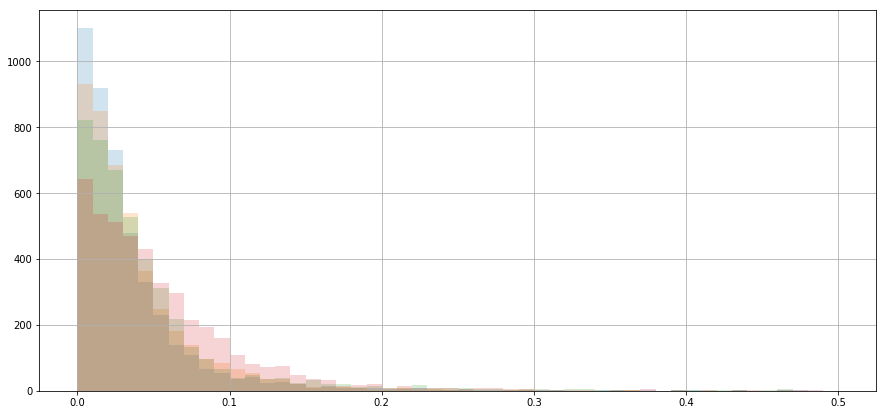

In [37]:
for g in range(1,5):
    dfz['field'+str(g)+'_diff'].apply(abs).hist(range=(0,.5),bins=50, alpha=.2)

In [38]:
[x for x in dfz.columns if 'field' in x]

['field1',
 'field1_pred',
 'field2',
 'field2_pred',
 'field3',
 'field3_pred',
 'field4',
 'field4_pred',
 'field1_diff',
 'field2_diff',
 'field3_diff',
 'field4_diff']

In [39]:
dfx

field1     field2     field3     field4  1  2  3  4  \
created_at                                                                    
2019-07-22 00:50:00  26.733333  63.666667  27.950000  62.000000  0  0  0  0   
2019-07-22 00:55:00  26.700000  64.000000  27.733333  61.666667  0  0  0  0   
2019-07-22 01:00:00  26.700000  64.333333  27.800000  62.000000  1  0  0  0   
2019-07-22 01:05:00  26.800000  63.500000  27.800000  62.500000  1  0  0  0   
2019-07-22 01:10:00  26.800000  65.000000  27.850000  62.500000  1  0  0  0   
2019-07-22 01:15:00  26.800000  66.000000  27.766667  62.666667  1  0  0  0   
2019-07-22 01:20:00  26.866667  65.333333  27.700000  62.500000  1  0  0  0   
2019-07-22 01:25:00  27.350000  64.500000  27.800000  63.000000  1  0  0  0   
2019-07-22 01:30:00  27.266667  63.333333  27.800000  63.000000  1  0  0  0   
2019-07-22 01:35:00  27.050000  64.500000  27.833333  62.333333  1  0  0  0   
2019-07-22 01:40:00  27.000000  64.666667  27.850000  61.500000  1  0  0  0   
2019-07-22 01:45:00  27.050000  64.500000  27.833333  61.666667  1  0  0  0   
2019-07-22 01:50:00  27.000000  65.000000  27.800000  62.000000  1  0  0  0   
2019-07-22 01:55:00  27.000000  64.500000  27.766667  61.333333  1  0  0  0   
2019-07-22 02:00:00  27.033333  65.000000  27.750000  62.000000  0  1  0  0   
2019-07-22 02:05:00  27.023492  65.133882  27.858760  62.239955  0  1  0  0   
2019-07-22 02:10:00  27.000000  65.000000  27.900000  62.000000  0  1  0  0   
2019-07-22 02:15:00  27.000000  65.000000  27.733333  61.666667  0  1  0  0   
2019-07-22 02:20:00  27.000000  65.000000  27.750000  61.500000  0  1  0  0   
2019-07-22 02:25:00  27.000000  64.500000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:30:00  27.000000  65.000000  27.766667  61.000000  0  1  0  0   
2019-07-22 02:35:00  27.050000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:40:00  27.000000  66.000000  27.766667  61.333333  0  1  0  0   
2019-07-22 02:45:00  27.000000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:50:00  27.000000  65.333333  27.800000  61.000000  0  1  0  0   
2019-07-22 03:00:00  26.966667  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:05:00  27.000000  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:10:00  27.006112  65.690211  27.806605  61.106199  0  0  1  0   
2019-07-22 03:15:00  27.050000  65.500000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:20:00  27.133333  65.666667  27.800000  60.666667  0  0  1  0   
...                        ...        ...        ...        ... .. .. .. ..   
2019-08-12 18:20:00  30.250000  65.500000  30.900000  63.000000  0  0  0  0   
2019-08-12 18:25:00  30.200000  66.000000  30.966667  63.333333  0  0  0  0   
2019-08-12 18:30:00  30.200000  66.000000  30.650000  63.000000  0  0  0  0   
2019-08-12 18:35:00  30.050000  65.500000  30.766667  63.000000  0  0  0  0   
2019-08-12 18:40:00  30.166667  65.666667  30.800000  63.000000  0  0  0  0   
2019-08-12 18:45:00  30.100000  66.000000  30.866667  63.000000  0  0  0  0   
2019-08-12 18:50:00  30.100000  66.000000  30.900000  63.000000  0  0  0  0   
2019-08-12 18:55:00  30.400000  65.000000  30.833333  63.000000  0  0  0  0   
2019-08-12 19:10:00  30.333333  65.000000  30.750000  63.000000  0  0  0  0   
2019-08-12 19:15:00  30.400000  65.000000  30.733333  63.000000  0  0  0  0   
2019-08-12 19:20:00  30.333333  65.000000  30.750000  63.500000  0  0  0  0   
2019-08-12 19:25:00  30.250000  65.000000  30.700000  63.000000  0  0  0  0   
2019-08-12 19:30:00  30.400000  65.000000  30.600000  64.000000  0  0  0  0   
2019-08-12 19:35:00  30.300000  65.000000  30.666667  63.333333  0  0  0  0   
2019-08-12 19:40:00  30.300000  65.000000  30.600000  63.000000  0  0  0  0   
2019-08-12 19:45:00  30.266667  65.000000  30.533333  64.000000  0  0  0  0   
2019-08-12 19:50:00  30.200000  65.000000  30.481448  64.227805  0  0  0  0   
2019-08-12 19:55:00  30.166667  65.000000  30.466667  64.000000  0  0  0  

In [40]:
raw = pd.read_pickle('raw_data.pickle')
raw

created_at  entry_id  field1  field2  field3  field4
0    2019-07-29 23:18:23     43673     NaN     NaN    29.6    60.0
1    2019-07-29 23:22:25     43674     NaN     NaN    29.7    60.0
2    2019-07-29 23:24:25     43675     NaN     NaN    29.8    60.0
3    2019-07-29 23:26:26     43676     NaN     NaN    29.9    59.0
4    2019-07-29 23:28:27     43677     NaN     NaN    29.8    60.0
5    2019-07-29 23:30:27     43678     NaN     NaN    29.8    60.0
6    2019-07-29 23:32:29     43679    28.5    69.0     NaN     NaN
7    2019-07-29 23:34:29     43680    28.5    69.0     NaN     NaN
8    2019-07-29 23:36:30     43681    28.5    69.0     NaN     NaN
9    2019-07-29 23:44:38     43682     NaN     NaN    30.0    61.0
10   2019-07-29 23:48:42     43683     NaN     NaN    30.0    62.0
11   2019-07-29 23:50:46     43684     NaN     NaN    30.1    64.0
12   2019-07-29 23:52:47     43685     NaN     NaN    30.2    61.0
13   2019-07-29 23:54:55     43686    28.5    71.0     NaN     NaN
14   2019-07-29 23:56:50     43687     NaN     NaN    30.1    62.0
15   2019-07-29 23:58:50     43688     NaN     NaN    30.0    62.0
16   2019-07-30 00:00:51     43689     NaN     NaN    30.0    63.0
17   2019-07-30 00:02:52     43690     NaN     NaN    30.0    62.0
18   2019-07-30 00:04:53     43691     NaN     NaN    30.0    62.0
19   2019-07-30 00:06:57     43692     NaN     NaN    29.8    63.0
20   2019-07-30 00:08:58     43693     NaN     NaN    29.8    63.0
21   2019-07-30 00:10:59     43694     NaN     NaN    29.8    63.0
22   2019-07-30 00:12:59     43695     NaN     NaN    29.7    63.0
23   2019-07-30 00:17:00     43696     NaN     NaN    29.8    63.0
24   2019-07-30 00:19:01     43697     NaN     NaN    29.8    63.0
25   2019-07-30 00:21:02     43698     NaN     NaN    29.8    63.0
26   2019-07-30 00:23:02     43699     NaN     NaN    29.8    62.0
27   2019-07-30 00:25:03     43700     NaN     NaN    29.7    61.0
28   2019-07-30 00:27:03     43701     NaN     NaN    30.0    62.0
29   2019-07-30 00:29:04     43702     NaN     NaN    29.8    62.0
...                  ...       ...     ...     ...     ...     ...
7970 2019-08-12 21:08:20     58925     NaN     NaN    33.0    61.0
7971 2019-08-12 21:10:21     58926     NaN     NaN    32.8    62.0
7972 2019-08-12 21:12:21     58927     NaN     NaN    32.8    61.0
7973 2019-08-12 21:14:22     58928     NaN     NaN    32.7    62.0
7974 2019-08-12 21:16:23     58929     NaN     NaN    32.7    62.0
7975 2019-08-12 21:18:23     58930     NaN     NaN    32.5    61.0
7976 2019-08-12 21:20:24     58931     NaN     NaN    32.5    63.0
7977 2019-08-12 21:22:24     58932     NaN     NaN    32.5    62.0
7978 2019-08-12 21:24:25     58933     NaN     NaN    32.5    61.0
7979 2019-08-12 21:26:25     58934     NaN     NaN    32.3    63.0
7980 2019-08-12 21:28:26     58935     NaN     NaN    32.5    64.0
7981 2019-08-12 21:30:27     58936     NaN     NaN    32.6    62.0
7982 2019-08-12 21:34:28     58937     NaN     NaN    32.7    60.0
7983 2019-08-12 21:36:28     58938     NaN     NaN    32.5    60.0
7984 2019-08-12 21:38:29     58939     NaN     NaN    32.5    60.0
7985 2019-08-12 21:40:29     58940     NaN     NaN    32.5    60.0
7986 2019-08-12 21:42:30     58941     NaN     NaN    32.5    60.0
7987 2019-08-12 21:44:30     58942     NaN     NaN    32.5    60.0
7988 2019-08-12 21:46:31     58943     NaN     NaN    32.4    60.0
7989 2019-08-12 21:48:32     58944     NaN     NaN    32.3    60.0
7990 2019-08-12 21:50:32     58945     NaN     NaN    32.4    60.0
7991 2019-08-12 21:52:33     58946     NaN     NaN    32.2    60.0
7992 2019-08-12 21:54:33     58947     NaN     NaN    32.0    61.0
7993 2019-08-12 21:56:34     58948     NaN     NaN    32.0    60.0
7994 2019-08-12 21:58:35     58949     NaN     NaN    32.1    60.0
7995 2019-08-12 22:00:35     58950     NaN     NaN    31.8    61.0
7996 2019-08-12 22:02:36     58951     NaN     NaN    31.9    62.0
7997 2019-08-12 22:04:37     58952     NaN     NaN    32.0   

In [41]:
field1 = raw[['created_at','field1']]

In [42]:
field1.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
field1['diff'] = field1['field1'] - field1['field1'].shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
field1.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
raw2 =  raw.set_index('created_at').resample("2T").mean().interpolate('linear')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023290965400>,
      dtype=object)

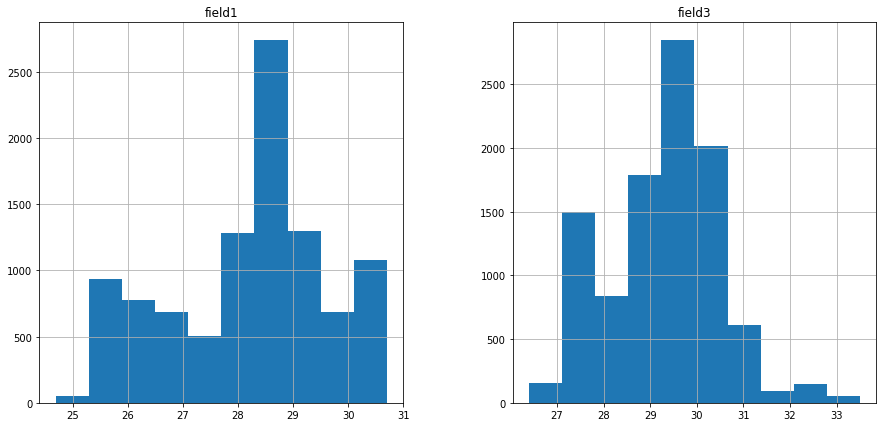

In [46]:
raw2[['field1','field3']].hist()

In [47]:
raw2['diff_1'] = raw2['field1'] - raw2['field1'].shift(1)
raw2['diff_2'] = raw2['field2'] - raw2['field2'].shift(1)
raw2['diff_3'] = raw2['field3'] - raw2['field3'].shift(1)
raw2['diff_4'] = raw2['field4'] - raw2['field4'].shift(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023290533208>,
      dtype=object)

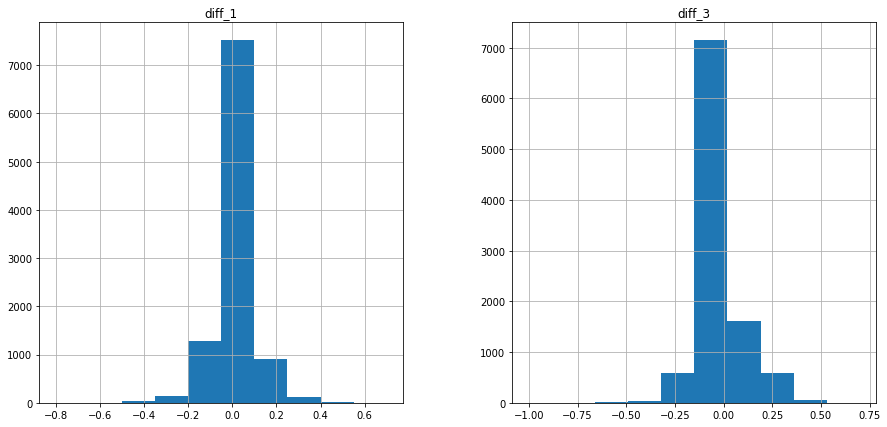

In [48]:
raw2[['diff_1','diff_3']].hist()

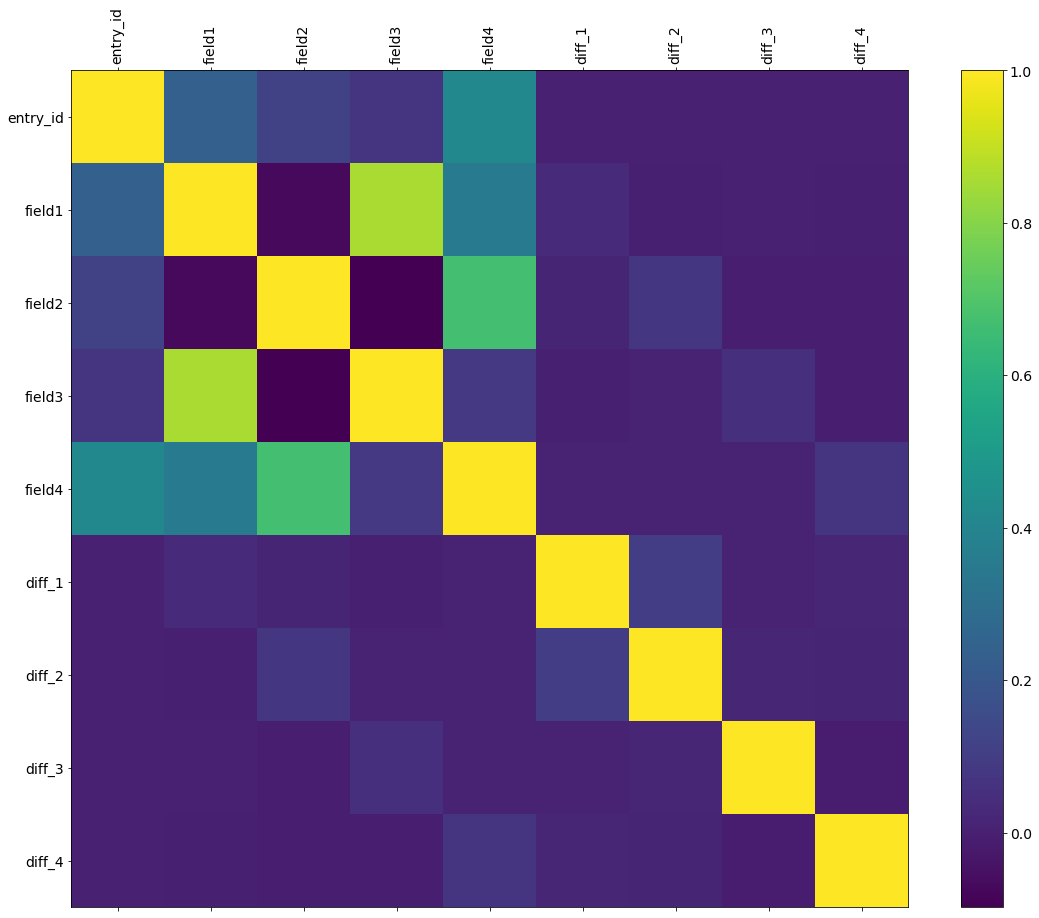

In [49]:
f = plt.figure(figsize=(19, 15))
plt.matshow(raw2.corr(), fignum=f.number)
plt.xticks(range(raw2.shape[1]), raw2.columns, fontsize=14, rotation=90)
plt.yticks(range(raw2.shape[1]), raw2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

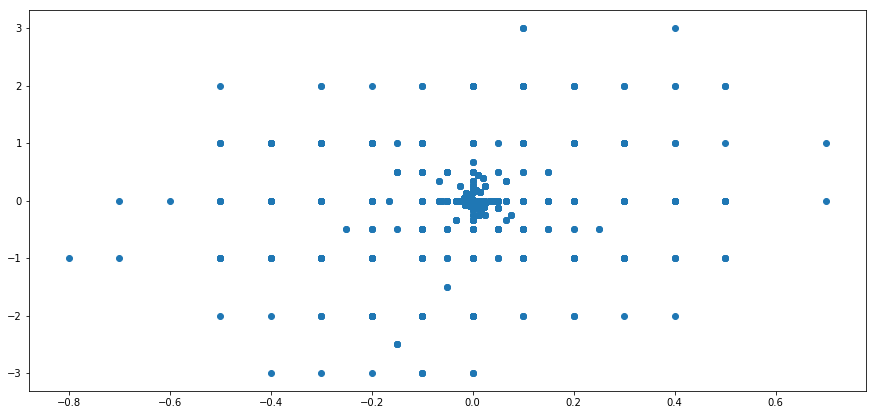

In [50]:
plt.scatter(raw2.diff_1,raw2.diff_2)

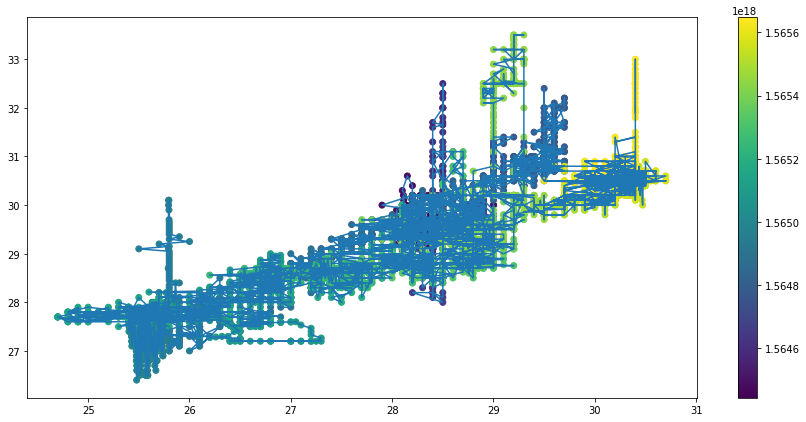

In [51]:
plt.scatter(raw2.field1,raw2.field3,c=raw2.index)
plt.plot(raw2.field1,raw2.field3)
plt.colorbar()

In [52]:
raw2.diff_1 = raw2.diff_1 + np.random.normal(0, .2, len(raw2.diff_1))

In [53]:
raw2.diff_3 = raw2.diff_3 + np.random.normal(0, .2, len(raw2.diff_3))

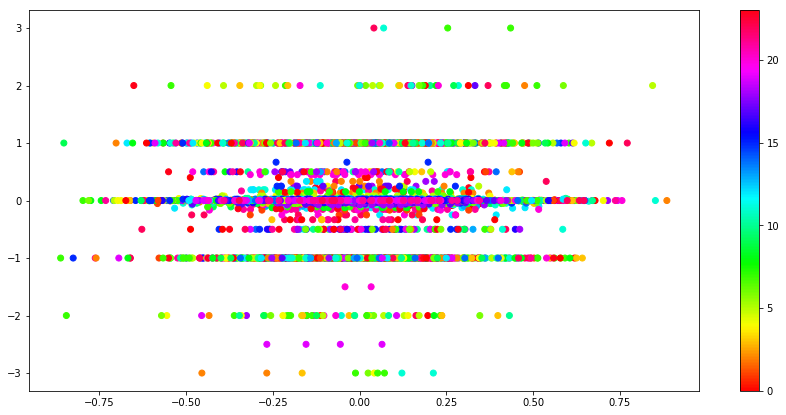

In [54]:
plt.scatter(raw2.diff_1,raw2.diff_2,c=raw2.index.hour,cmap='hsv')
plt.colorbar()

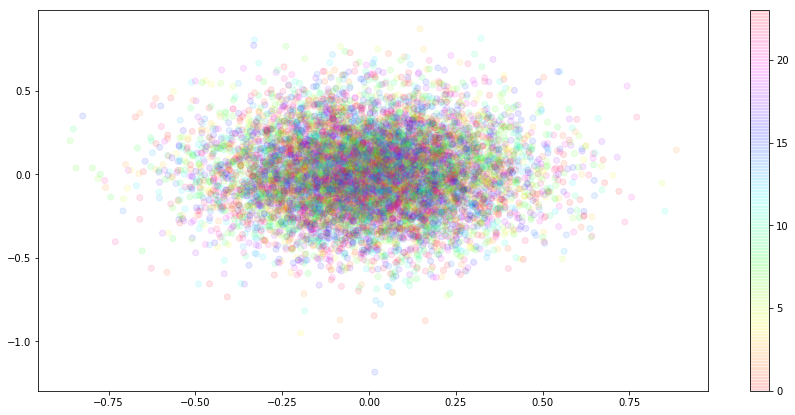

In [55]:
plt.scatter(raw2.diff_1,raw2.diff_3,c=raw2.index.hour,cmap='hsv', alpha=.1)
plt.colorbar()

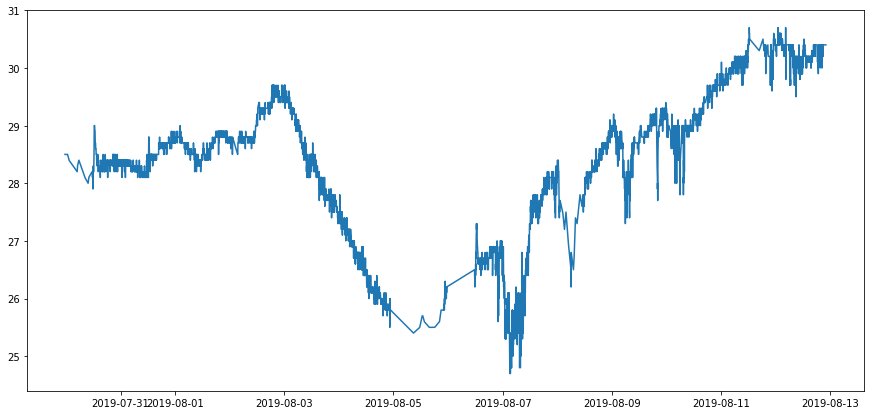

In [56]:
plt.plot(raw2.field1)

In [57]:
raw2['hour'] = raw2.index.hour + np.round(raw2.index.minute/3,0)/10

In [153]:
g = 5

In [126]:
df['hour'] = (df.index.hour*10  +df.index.minute/6).astype(int) # + df.index.second/3600)/24

In [154]:
df['diff_5min'] = (df['field1'] - df['field1'].shift(g))*60/5/g

In [155]:
m = df.groupby('hour').mean()['diff_5min']
sd = df.groupby('hour').std()['diff_5min']

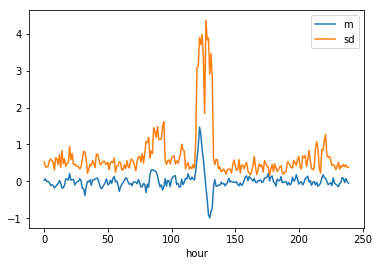

In [156]:
m = pd.DataFrame(m)
sd = pd.DataFrame(sd)
graf = pd.concat([m,sd], axis = 1)
graf.columns = ['m','sd']
graf.plot()

In [157]:
def average_m(hour):
    return m[m.index == hour].values.mean()

def average_sd(hour):
    return sd[sd.index == hour].values.mean()*1.5

In [166]:
df['field1_error1'] = df['field1'].shift(g) + df['hour'].apply(average_m) + df['hour'].apply(average_sd)
df['field1_error2'] = df['field1'].shift(g) + df['hour'].apply(average_m) - df['hour'].apply(average_sd)
df['field1_error'] = (df['field1'] - (df['field1'].shift(g) + df['hour'].apply(average_m)) )

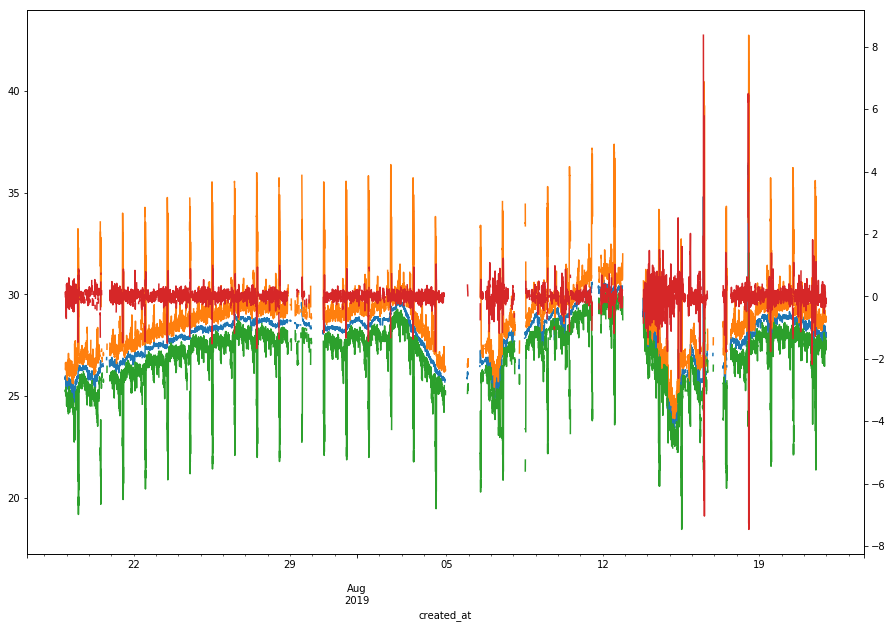

In [167]:
df['field1'].plot(figsize=(15,10))
df['field1_error1'].plot()
df['field1_error2'].plot()
df['field1_error'].plot(secondary_y=True)